# Dimensionality reduction

We do the exercises 9 and 10 from chapter 08 of the book "Hands On Machine Learning with Scikit learn".

## Exercise 9

Load the MNIST dataset and split it into a training set and a test set. Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

### 1.1 Data loading

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

### 1.2 train/test split

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, y_train = mnist['data'][:60000], mnist['target'][:60000].astype(np.uint8)
X_test, y_test = mnist['data'][60000:], mnist['target'][60000:].astype(np.uint8)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### 1.3 Preprocessing pipeline

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline(
    steps=[
        ('std_scaler', StandardScaler())
    ]
)

In [6]:
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

### 1.4 Random forest without PCA

In [7]:
from sklearn.ensemble import RandomForestClassifier

random_forest_without_pca = RandomForestClassifier(random_state=42)

In [12]:
import time
import joblib
start = time.time()
random_forest_without_pca.fit(X_train_transformed, y_train)
stop = time.time()
joblib.dump(random_forest_without_pca, 'models/08_random_forest_without_pca.pkl')
training_time = stop-start
print(f"Training time was: {training_time} seconds or {training_time/60.0} minutes")

Training time was: 31.258306741714478 seconds or 0.5209717790285746 minutes


### 1.5 score on test set

In [13]:
score = random_forest_without_pca.score(X_test_transformed, y_test)
print(f"Score is {score}")

Score is 0.9686


### 1.6 perform PCA on the data

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"The estimated number of components is {pca.n_components_}")

The estimated number of components is 154


In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest_with_pca = RandomForestClassifier(random_state=42)

In [22]:
import time
import joblib
start = time.time()
random_forest_with_pca.fit(X_train_pca, y_train)
stop = time.time()
joblib.dump(random_forest_with_pca, 'models/08_random_forest_with_pca.pkl')
training_time = stop-start
print(f"Training time was: {training_time} seconds or {training_time/60.0} minutes")

Training time was: 65.3332109451294 seconds or 1.08888684908549 minutes


The training time doubled!! So dimensionality reduction does not always help to reduce the training time

### 1.7 score the pca model

In [17]:
score = random_forest_with_pca.score(X_test_pca, y_test)
print(f"Score is {score}")

Score is 0.9345


The performance on the test set droped. So dimensionality reduction does not always help.

## Exercise 10

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using matplotlib. You can use a scatterplot using 10 differnt colors to represent each image' target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance's class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You shoudl get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE or MDS and compare the resulting visualtization.

### 2.1 Data loading

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

### 2.2 random selecting entries in the data

In [32]:
import numpy as np
idx = np.random.choice(len(mnist['data']), 10000)
samples_x = mnist['data'][idx]
samples_y = mnist['target'][idx].astype(np.uint8)

In [33]:
samples_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
samples_x.shape

(10000, 784)

### 2.3 Reduce the data with t-SNE

In [35]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_jobs=-1)
tsne_data = tsne.fit_transform(samples_x)

### 2.4 plot the reduced data

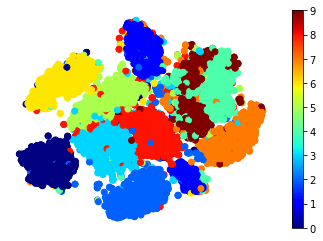

In [36]:
import matplotlib.pyplot as plt

plt.scatter(tsne_data[:,0], tsne_data[:,1], c=samples_y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

### 2.5 try a different random sample

In [37]:
other_idx = np.random.choice(len(mnist['data']), 10000)
other_sample_x = mnist['data'][other_idx]
other_samples_y = mnist['target'][other_idx].astype(np.uint8)

In [38]:
from sklearn.manifold import TSNE
other_tsne = TSNE(n_components=2, n_jobs=-1)
other_tsne_data = tsne.fit_transform(other_sample_x)

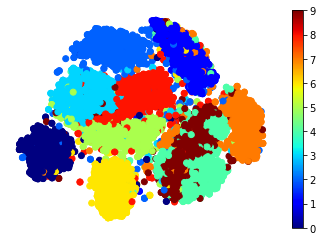

In [39]:
import matplotlib.pyplot as plt

plt.scatter(other_tsne_data[:,0], other_tsne_data[:,1], c=other_samples_y, cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

The location of the clusters changes with the sample!